<a href="https://colab.research.google.com/github/Tiagoalvesds/tesouro_direto/blob/main/tesourodireto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [2]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sb
%pip install matplotlib
import matplotlib.pyplot as plot


# API -Tesouro Transparente

In [3]:
url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'

# Organizando o Dataframe

In [4]:
df = pd.read_csv(url, sep =';')
df.head()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro Prefixado,01/07/2010,02/01/2009,"12,20","12,24","843,72","843,28","842,89"
1,Tesouro Prefixado,01/01/2011,02/01/2009,"12,29","12,34","794,54","793,84","793,47"
2,Tesouro Prefixado,01/01/2010,02/01/2009,"12,21","12,25","892,40","892,09","891,68"
3,Tesouro IPCA+ com Juros Semestrais,15/05/2045,02/01/2009,"7,39","7,49","1503,08","1484,46","1483,55"
4,Tesouro IPCA+ com Juros Semestrais,15/05/2035,02/01/2009,"7,42","7,52","1523,47","1506,03","1505,11"


# Funções de Busca

In [5]:
def busca_titulos_tesouro_direto():
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)

  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]
  return df

In [6]:
titulos = busca_titulos_tesouro_direto()
titulos

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro Prefixado                  2010-07-01      2009-01-02              12.20   
                                   2011-01-01      2009-01-02              12.29   
                                   2010-01-01      2009-01-02              12.21   
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2009-01-02               7.39   
                                   2035-05-15      2009-01-02               7.42   
...                                                                          ...   
                                   2020-08-15      2009-05-12               7.13   
                                   2009-05-15      2009-05-12               3.59   
                                   2010-08-15      2009-05-12               5.42   
                                   2011-05-15      2009-05-12               6.13   
                                   2012-08-15      2009-05-12               6.71   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro Prefixado                  2010-07-01      2009-01-02             12.24   
                                   2011-01-01      2009-01-02             12.34   
                                   2010-01-01      2009-01-02             12.25   
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2009-01-02              7.49   
                                   2035-05-15      2009-01-02              7.52   
...                                                                         ...   
                                   2020-08-15      2009-05-12              7.21   
                                   2009-05-15      2009-05-12              3.61   
                                   2010-08-15      2009-05-12              5.44   
                                   2011-05-15      2009-05-12              6.17   
                                   2012-08-15      2009-05-12              6.75   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro Prefixado                  2010-07-01      2009-01-02           843.72   
                                   2011-01-01      2009-01-02           794.54   
                                   2010-01-01      2009-01-02           892.40   
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2009-01-02          1503.08   
                                   2035-05-15      2009-01-02          1523.47   
...                                                                        ...   
                                   2020-08-15      2009-05-12          1696.20   
                                   2009-05-15      2009-05-12          1875.24   
                                   2010-08-15      2009-05-12          1860.11   
                                   2011-05-15      2009-05-12          1871.40   
                                   2012-08-15      2009-05-12          1811.47   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro Prefixado                  2010-07-01      2009-01-02          843.28   
                                   2011-01-01      2009-01-02          793.84   
                                   2010-01-01      2009-01-02          892.09   
Tesouro IPCA+ com Juros Semestrais 2045-05-15      2009-01-02         1484.46   
                                   2035-05-15      2009-01-02         1506.03   
...                                                                       ...   
                                   2020-08-15      2009-05-12         1686.00   
                                   2009-05-15      2009-05-12         1875.23   
             

# Análise Exploratória do Dataframe

In [7]:
#Tamanho do corpo(linhas e colunas)
df.shape

(134915, 8)

In [8]:
#Verificando valores faltantes
df.isnull().sum()

Tipo Titulo          0
Data Vencimento      0
Data Base            0
Taxa Compra Manha    0
Taxa Venda Manha     0
PU Compra Manha      0
PU Venda Manha       0
PU Base Manha        0
dtype: int64

In [9]:
# 1° Verificando Títulos únicos
titulo = df['Tipo Titulo'].unique()
titulo

array(['Tesouro Prefixado', 'Tesouro IPCA+ com Juros Semestrais',
       'Tesouro IPCA+', 'Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Prefixado com Juros Semestrais', 'Tesouro Selic',
       'Tesouro Renda+ Aposentadoria Extra', 'Tesouro Educa+'],
      dtype=object)

In [10]:
# 2° Verificando Data base únicos
data_base = df['Data Base'].unique()
data_base

array(['02/01/2009', '31/12/2008', '30/12/2008', ..., '16/07/2009',
       '14/05/2009', '13/05/2009'], dtype=object)

In [11]:
# 3° Verificando Vencimentos únicos
data_vencimento=df['Data Vencimento'].unique()
data_vencimento

array(['01/07/2010', '01/01/2011', '01/01/2010', '15/05/2045',
       '15/05/2035', '15/08/2024', '15/05/2017', '15/05/2015',
       '15/05/2013', '15/08/2012', '15/05/2011', '15/08/2010',
       '15/05/2009', '01/01/2031', '01/03/2011', '01/07/2017',
       '01/04/2021', '01/01/2013', '01/01/2014', '01/01/2017',
       '01/01/2012', '07/03/2012', '16/03/2011', '17/03/2010',
       '18/03/2009', '07/03/2014', '07/03/2013', '01/04/2009',
       '01/07/2009', '01/10/2009', '01/01/2009', '01/01/2008',
       '18/01/2006', '17/01/2007', '18/06/2008', '01/07/2007',
       '01/01/2007', '01/04/2007', '01/10/2006', '01/07/2006',
       '01/04/2006', '01/01/2006', '15/08/2008', '15/05/2007',
       '15/08/2006', '01/12/2005', '01/04/2008', '01/12/2006',
       '01/07/2008', '01/10/2008', '01/10/2007', '01/07/2005',
       '16/02/2005', '01/04/2005', '01/10/2005', '04/01/2005',
       '08/03/2013', '15/08/2026', '15/05/2029', '01/01/2027',
       '01/01/2029', '01/01/2033', '01/01/2025', '15/12

# Seleção de Título

In [12]:
# 4º Selecionando ativo e vencimento

select_tesouro = titulos.loc [('Tesouro Prefixado', '01-01-2026')]
select_tesouro.head()

<ipython-input-12-083e9f40cec8>:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  select_tesouro = titulos.loc [('Tesouro Prefixado', '01-01-2026')]


,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2023-07-07,10.22,10.34,784.96,782.54,782.54
2023-07-06,10.26,10.38,783.95,781.52,781.52
2023-05-19,11.29,11.41,755.34,752.88,752.88
2023-05-18,11.31,11.43,754.66,752.21,752.21
2023-09-25,10.29,10.41,800.66,798.37,798.37


In [13]:
#Selecionando taxas
tx_compra = select_tesouro.loc[:,'Taxa Compra Manha']
tx_compra

Data Base
2023-07-07    10.22
2023-07-06    10.26
2023-05-19    11.29
2023-05-18    11.31
2023-09-25    10.29
              ...  
2020-02-14     6.23
2020-02-13     6.28
2020-02-12     6.22
2020-02-11     6.26
2020-02-10     6.36
Name: Taxa Compra Manha, Length: 917, dtype: float64

# Gráfico

<Axes: xlabel='Data Base'>

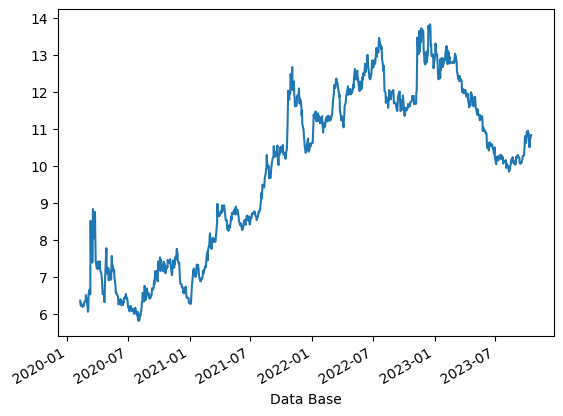

In [14]:
select_tesouro ['Taxa Compra Manha'].plot()

# Cálculo dos Quartis

In [15]:
# 1° Melhor Taxa de Compra
Q4 = np.percentile(tx_compra,[100])
Q4

array([13.84])

In [16]:
# 2° Melhor Taxa de Compra
Q3 = np.percentile(tx_compra,[75])
Q3

array([11.89])

In [17]:
# 3° Média Taxa de Compra
Q2 = np.percentile(tx_compra,[50])
Q2

array([10.3])

In [18]:
# 4° Ruim Taxa de Compra
Q1 = np.percentile(tx_compra,[25])
Q1

array([7.45])

In [19]:
# Péssima Taxa de Compra
Q0 = np.percentile(tx_compra,[0])
Q0

array([5.81])

In [20]:
tx_compra. describe()

count    917.000000
mean       9.886423
std        2.301583
min        5.810000
25%        7.450000
50%       10.300000
75%       11.890000
max       13.840000
Name: Taxa Compra Manha, dtype: float64